In [3]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.xarray
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

ModuleNotFoundError: No module named 'hvplot'

# <font color=blue>_Centre Calibration from Field Rastering at $\phi = 0^\circ$ and $\phi = 90^\circ$_</font>

In [7]:
x_start, x_end, x_step = 15, 30, 1
y_start, y_end, y_step = 15, 30, 1
x_pts = np.arange(x_start, x_end+x_step, x_step)
y_pts = np.arange(y_start, y_end+y_step, y_step)

Import data from csv

In [3]:
phi0 = pd.read_csv('./2019-06-01/field_raster_fieldRaster_2019-06-01_7.csv', comment='#')
phi90 = pd.read_csv('./2019-06-01/field_raster_fieldRaster_2019-06-01_8.csv', comment='#')

In [1]:
print(phi0['Yfield_avg'])

NameError: name 'phi0' is not defined

Text(0.5, 1.0, 'phi0 xy plane field')

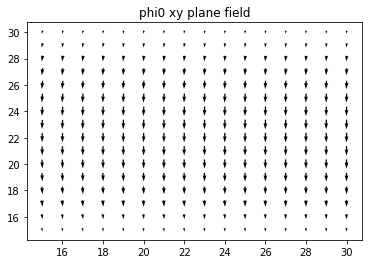

In [8]:
x = phi0['X']
y = phi0['Y']
z = [0]

x_field = phi0['Xfield_avg']
y_field = phi0['Yfield_avg']
z_field = phi0['Zfield_avg']

plt.quiver(x, y, x_field, y_field, pivot='middle', scale = 2)
plt.title('phi0 xy plane field')
#fig = plt.figure()
#ax = fig.add_subplot(111, projection ='3d')
#ax.quiver(x_pts, y_pts, z_pts, x_field, y_field, z_field, length = 0.9)

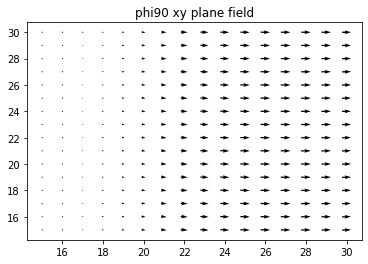

In [9]:
x = phi90['X']
y = phi90['Y']
z = [0]

x_field = phi90['Xfield_avg']
y_field = phi90['Yfield_avg']
z_field = phi90['Zfield_avg']
plt.title('phi90 xy plane field')
plt.quiver(x, y, x_field, y_field, pivot='middle', scale = 2)

In [10]:
#Data variables dict
phi0_data_vars = {}
phi90_data_vars = {}

#Add (dims, data) tuple for each variable column to dict
for var in phi0.columns[:]:
    dims = ["Xpos", "Ypos"]
    data0 = phi0[var].values.reshape(x_pts.size, y_pts.size)
    data90 = phi90[var].values.reshape(x_pts.size, y_pts.size)

    phi0_data_vars[var] = (dims, data0)
    phi90_data_vars[var] = (dims, data90)

coords = {"Xpos":('Xpos', x_pts), "Ypos":('Ypos', y_pts)}
phi0_dataset = xr.Dataset(phi0_data_vars, coords)
phi90_dataset = xr.Dataset(phi90_data_vars, coords)

In [55]:
phi0_dataset.Yfield_avg.hvplot()

:Image   [Ypos,Xpos]   (Yfield_avg)

In [56]:
phi90_dataset.Yfield_avg.hvplot()

:Image   [Ypos,Xpos]   (Yfield_avg)

In [57]:
phi90_dataset.Xfield_avg.hvplot()

:Image   [Ypos,Xpos]   (Xfield_avg)

In [58]:
phi0_dataset.Xfield_avg.hvplot()

:Image   [Ypos,Xpos]   (Xfield_avg)

In [11]:
phi0_dataset.Zfield_avg.hvplot()

:Image   [Ypos,Xpos]   (Zfield_avg)

In [12]:
phi90_dataset.Zfield_avg.hvplot()

:Image   [Ypos,Xpos]   (Zfield_avg)

In [13]:
combined = (phi0_dataset**2 + phi90_dataset**2)

In [14]:
combined.hvplot()

:Image   [Ypos,Xpos]   (X)